In [5]:
import pandas as  pd
import numpy as  np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold

# Import Dataset

In [6]:
db = pd.read_csv('diabetes.csv')
db 



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Ordinal encoder for db data 

In [8]:
OEnc = OrdinalEncoder()
db[['gender', 'age', 'smoking_history', 'bmi' , 'HbA1c_level']] = OEnc.fit_transform(db[['gender', 'age', 'smoking_history', 'bmi' , 'HbA1c_level']])

# Y for diabetes X for else

In [10]:
Y = db["diabetes"]
X = db.drop("diabetes", axis = 1)

In [12]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,101.0,0,1,4.0,1334.0,11.0,140
1,0.0,75.0,0,0,0.0,1547.0,11.0,80
2,1.0,49.0,0,0,4.0,1547.0,5.0,158
3,0.0,57.0,0,0,1.0,1160.0,4.0,155
4,1.0,97.0,1,1,1.0,829.0,3.0,155
...,...,...,...,...,...,...,...,...
99995,0.0,101.0,0,0,0.0,1547.0,9.0,90
99996,0.0,23.0,0,0,0.0,552.0,10.0,100
99997,1.0,87.0,0,0,3.0,1598.0,5.0,155
99998,0.0,45.0,0,0,4.0,2357.0,1.0,100


In [13]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

# Kfolds for training data splitting 2 shuffle - false random state - None 

In [ ]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

# Decision treeeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

# Splitting the dataset into training and testing sets 

In [28]:
from sklearn import metrics

In [31]:
for train_index, test_index in kf.split(db):
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    dtc.fit(X_train, Y_train)#, X_train, Y_train
    Y_pred = dtc.predict(X_test)#predict X_test
    print(round(metrics.accuracy_score(Y_test,Y_pred) * 100,2))
    print(round(metrics.f1_score(Y_test,Y_pred) * 100,2))
    print('-'*20)


97.21
80.52
--------------------
97.16
79.33
--------------------
97.11
80.11
--------------------
97.32
81.22
--------------------
97.14
79.64
--------------------


##### Dtc with hyperparameter max_depth=5: This parameter sets the maximum depth of the tree to 5 levels. It helps to prevent overfitting by limiting how deep the tree can grow.
#### min_samples_split=10: This parameter specifies the minimum number of samples required to split an internal node. In this case, a node will only be split if it has at least 10 samples.


In [33]:
dtchp = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)


In [34]:
for train_index, test_index in kf.split(db):
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    dtchp.fit(X_train, Y_train)#, X_train, Y_train
    Y_pred = dtchp.predict(X_test)#predict X_test
    print(round(metrics.accuracy_score(Y_test,Y_pred) * 100,2))
    print(round(metrics.f1_score(Y_test,Y_pred) * 100,2))
    print('-'*20)

97.21
80.52
--------------------
97.16
79.33
--------------------
97.11
80.11
--------------------
97.32
81.22
--------------------
97.14
79.64
--------------------


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# New model random forest

In [39]:
rf = RandomForestClassifier(random_state=42)
for train_index, test_index in kf.split(db):
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    rf.fit(X_train, Y_train)#, X_train, Y_train
    Y_pred = rf.predict(X_test)#predict X_test
    print(round(metrics.accuracy_score(Y_test,Y_pred) * 100,2))
    print(round(metrics.f1_score(Y_test,Y_pred) * 100,2))
    print('-'*20)

97.06
80.0
--------------------
97.02
78.99
--------------------
96.91
79.44
--------------------
97.16
80.67
--------------------
96.98
79.32
--------------------


# New model logistic regression

In [42]:
lr = LogisticRegression(random_state=42)
for train_index, test_index in kf.split(db):
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    rf.fit(X_train, Y_train)#, X_train, Y_train
    Y_pred = rf.predict(X_test)#predict X_test
    print(round(metrics.accuracy_score(Y_test,Y_pred) * 100,2))
    print(round(metrics.f1_score(Y_test,Y_pred) * 100,2))
    print('-'*20)

97.06
80.0
--------------------
97.02
78.99
--------------------
96.91
79.44
--------------------
97.16
80.67
--------------------
96.98
79.32
--------------------


In [48]:
import matplotlib.pyplot as plt


#  show tree without parameters

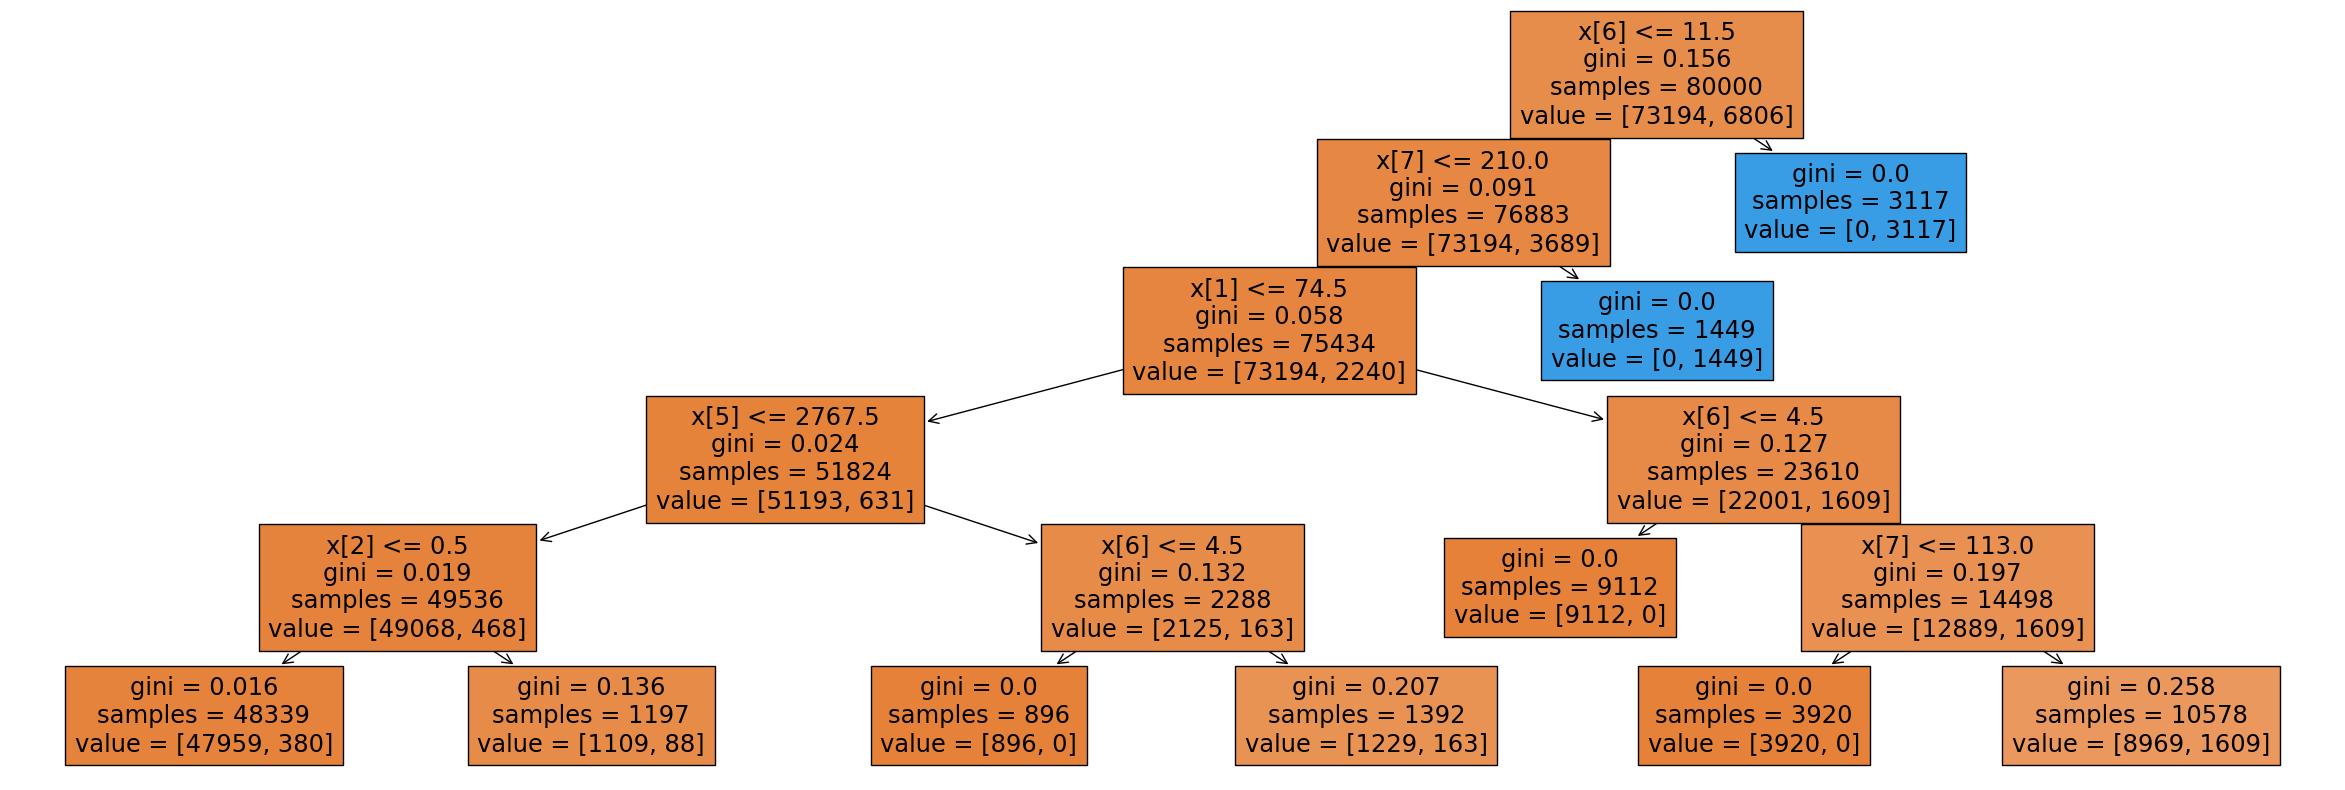

In [51]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtc,filled=True)
print()

show tree with parameters

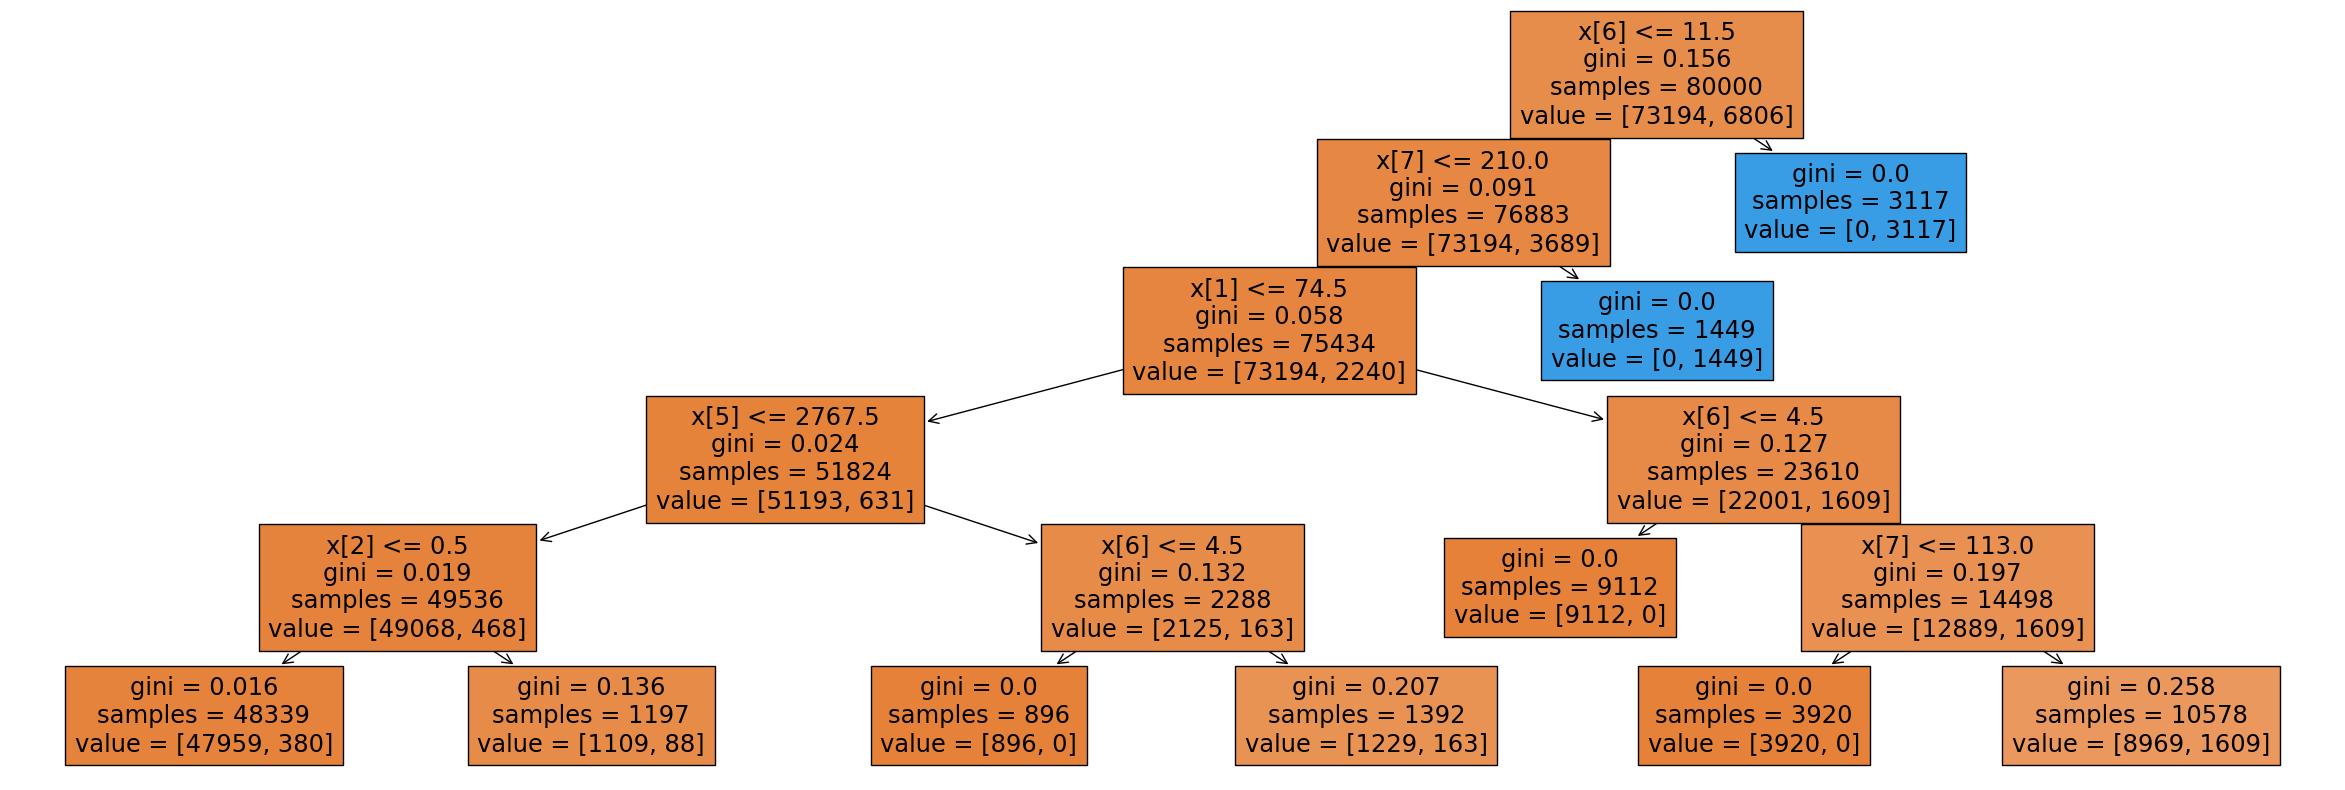

In [52]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtchp,filled=True)
print()